<a href="https://colab.research.google.com/github/eumiguelvieira09/cgeanalise/blob/main/LIMPEZA_VISUALIZA%C3%87%C3%83O_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar os pacotes que serão utilizados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)


In [ ]:
#OBSERVAÇÕES

#Algumas células podem ser repetidas, pois durante a execução foram feitos testes


#VARIAVEIS
#contrato = conjunto original
#itens_contrato = conjunto itens original
#ordem_decrescente = conjunto contrato decrescente
#ordem_decrescente_itens= conjunto itens decrescente
#result = coluna merged (integrada)
#resulttt = linhas concatenadas
#top10 = top10 mais frequentes requerentes

In [ ]:
#-----------------------------------------------------------------AQUI COMEÇA O TRATAMENTO -----------------------------------------------------------------------------

In [ ]:
#Fazendo a leitura do dataframe "Contratos" após transformar o tipo de arquivo
#para 'utf-8'
contrato = pd.read_csv('/content/drive/MyDrive/PROJETO_ANALISE_CGE/ARQUIVOS_PROJETO/CONTRATOS_PROJETO.txt', delimiter = ";")
print(contrato)
contrato.head()

In [ ]:
#No segundo arquivo do projeto chamado "ITENS_CONTRATO" foi feito o mesmo processo

itens_contrato = pd.read_csv('/content/drive/MyDrive/PROJETO_ANALISE_CGE/ARQUIVOS_PROJETO/ITENS_CONTRATOS_PROJETO.txt', delimiter = ";")
print(itens_contrato)

In [ ]:
##Temos df sendo o conjunto de contratos e df2 sendo o conjunto de itens por contrato
##df tem 100k ocorrencias e df2 200k
#verificar as colunas para começar a analisar e fazer o redimensionamento

print(contrato.columns)
print(itens_contrato.columns)

In [ ]:
contrato.dtypes  #processo para descobrir os tipos de variáveis (argumentos)

In [ ]:
itens_contratos.dtypes#processo para descobrir os tipos de variáveis (argumentos)

In [ ]:
contrato.columns #identificar e perceber quais colunas retirar ou não


#df_selected_columns = df.loc[:, ['Contratação', 'Unidade', 'Fornecedor', 'CPF/CNPJ', 'Valor Total Contrato/Valor Estimado para Contratação (R$)', 'Valor Total Empenhado (R$)', 'Valor Total Liquidado (R$)', 'Valor Total Pago (R$)']]
#print(df_selected_columns)

In [33]:
#Retirada das colunas

contrato = contrato[['Contratação',
                     'Status Contratação',
                     'Data Contratação',
                     'Unidade',
                     #'Processo', 'Objeto',
                     'Tipo de Aquisição',
                     #'Critério de Julgamento',
                     'Data Início Vigência',
                     'Data Fim Vigência',
                     'Fornecedor',
                     'CPF/CNPJ',
                     'Valor Total Contrato/Valor Estimado para Contratação (R$)',
                     'Valor Total Empenhado (R$)',
                     'Valor Total Liquidado (R$)',
                     ' Valor Total Pago (R$)',
                     #'Data Public DEORJ', 'data_extracao'
                   ]].copy()

In [ ]:
contrato.head()

In [ ]:
itens_contrato.columns

In [5]:
itens_contrato = itens_contrato[['Contratação',
                                 'ID Item',
                                 'Item',
                                 'Qtde Original',
                                 'VL. Unit.Original',
                                 'Total Aditivada/Suprimida',
                                 'VL. Unit.Aditivado/Suprimido',
                                 #'data_extracao'
                                 ]].copy()

In [ ]:
itens_contrato.shape #verificar o tamanho do data frame (conferencia)
indice = result_vertical_sorted.iloc[283085:283101]  #verificar algum indice
indice.head(30)

In [ ]:
contrato.isna().sum()  #mostrar a soma dos vazios ou sem resposta

In [ ]:
itens_contrato.duplicated(subset=['Contratação']).sum()

In [ ]:
contrato = contrato.loc[~contratos.duplicated(subset=['Unidade','Contratação','Fornecedor'])] \
  .reset_index(drop=True).copy()
  ##novo index sem as colunas repitidas
  #retirada caso tivesse duplicata

In [ ]:
contrato['Contratação'].value_counts()   #não existe repetição de contrato

In [ ]:
#caso queira baixar esse dataset tratado

from google.colab import files

contrato.to_csv('contrato.csv')
files.download('contrato.csv')

In [ ]:
#itens_contrato.loc[itens_contrato.duplicated()]    #mostrou que não tem duplicata
itens_contrato['Contratação'].value_counts()
 #mostrou que tem mais de um item por certos processos


In [ ]:
##-----------------------------------------AQUI COMEÇA A ORGANIZAÇÃO DE DADOS ----------------------------------------------------------------------------

In [ ]:
#Aqui eu busquei:
#1. Organizar os data frames
#2. Criar formas de acessar os itens
#
#

In [ ]:
from google.colab import files

numero_contrato.to_csv('numero_contrato.csv')
files.download('numero_contrato.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# Ordenar o DataFrame com base na coluna 'A' em ordem decrescente   #contrato
ordem_decrescente = contrato.sort_values(by='Contratação', ascending=False).reset_index()

# Exibir o DataFrame ordenado
print(ordem_decrescente)
ordem_decrescente.head(50)

        index  Contratação Status Contratação Data Contratação  \
0          63   2024000359          Em Aberto       29/01/2024   
1          62   2024000358          Em Aberto       29/01/2024   
2          61   2024000357          Em Aberto       29/01/2024   
3          60   2024000356              Ativo       29/01/2024   
4          59   2024000355          Em Aberto       29/01/2024   
...       ...          ...                ...              ...   
101444   9931   2011000012          Encerrado       10/06/2011   
101445   9930   2011000011          Encerrado       10/06/2011   
101446   9929   2011000010          Encerrado       08/06/2011   
101447   9928   2011000008          Cancelado       18/05/2011   
101448   9927   2011000006          Cancelado       12/05/2011   

                                                  Unidade  \
0        FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO   
1        FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO   
2       AGENERSA - AG RE

,index,Contratação,Status Contratação,Data Contratação,Unidade,Tipo de Aquisição,Data Início Vigência,Data Fim Vigência,Fornecedor,CPF/CNPJ,Valor Total Contrato/Valor Estimado para Contratação (R$),Valor Total Empenhado (R$),Valor Total Liquidado (R$),Valor Total Pago (R$)
0,63,2024000359,Em Aberto,29/01/2024,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,Solicitação de Compra,13/03/2023,12/03/2024,LEMAN MEDICAMENTOS E CIA LTDA,40.600.760/0001-54,1289862,NaN,NaN,NaN
1,62,2024000358,Em Aberto,29/01/2024,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,Solicitação de Compra,13/03/2023,12/03/2024,ONCOVIT DISTRIBUIDORA DE MEDICAMENTOS LTDA ME ...,10.586.940/0001-68,1704,NaN,NaN,NaN
2,61,2024000357,Em Aberto,29/01/2024,AGENERSA - AG REGUL ENERGIA E SANEAMENTO DO ES...,Dispensa - Especial,NaN,NaN,PRODERJ - CENTRO DE TECNOLOGIA DE INFORMACAO E...,30.121.578/0001-67,"55718,4",NaN,NaN,NaN
3,60,2024000356,Ativo,29/01/2024,SEPM - Secretaria de Estado de Polícia Militar,Inexigibilidade - Lei 8.666,03/01/2024,02/01/2025,GBG COMERCIO DE PNEUS E SERVIÇOS LTDA,05.247.910/0005-10,"549999,9996",NaN,NaN,NaN
4,59,2024000355,Em Aberto,29/01/2024,FUNESPOM - FUNDO ESP. POLÍCIA MILITAR RJ,Solicitação de Compra,NaN,NaN,AGUA MINERAL OASIS DA SAUDE LTDA,09.176.323/0001-05,225060,NaN,NaN,NaN
5,58,2024000354,Ativo,29/01/2024,SEAP - SECRETARIA DE ESTADO DE ADMIN.PENITENCI...,Dispensa - Especial,29/01/2024,31/12/2024,STRELLA SERVICOS LTDA,30.431.915/0001-12,"11401609,44",NaN,NaN,NaN
6,57,2024000353,Em Aprovação,29/01/2024,SEAP - SECRETARIA DE ESTADO DE ADMIN.PENITENCI...,Dispensa - Especial,29/01/2024,31/12/2024,STRELLA SERVICOS LTDA,30.431.915/0001-12,"9410248,32",NaN,NaN,NaN
7,56,2024000352,Em Aberto,29/01/2024,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,Solicitação de Compra,27/10/2023,26/10/2024,SIOLMAR GABRIELA PASCUALINI PIERRIN E CIA LTDA...,11.377.867/0001-87,51030,NaN,NaN,NaN
8,55,2024000351,Ativo,29/01/2024,SEPM - Secretaria de Estado de Polícia Militar,Inexigibilidade - Lei 8.666,27/12/2023,26/12/2024,JOSE REIS DA SILVA - PRESTAÇÃO DE SERVIÇO - ME,08.014.907/0001-11,"549999,9996",NaN,NaN,NaN
9,54,2024000350,Em Aberto,29/01/2024,INEA - INSTITUTO ESTADUAL DO AMBIENTE,Inexigibilidade - 14.133/2021,NaN,NaN,OPEN TREINAMENTOS EMPRESARIAIS E EDITORA LTDA. ME,09.094.300/0001-51,7188,NaN,NaN,NaN


In [ ]:
import pandas as pd  ########################################

# Supondo que 'coluna' seja a coluna que você deseja verificar e remover strings
itens_contrato['Contratação'] = pd.to_numeric(itens_contrato['Contratação'], errors='coerce')

# Remover as linhas que contêm NaN ou inf na coluna 'coluna'
itens_contrato = itens_contrato[~itens_contrato['Contratação'].isna()]

# Converter a coluna 'coluna' para inteiros
itens_contrato['Contratação'] = itens_contrato['Contratação'].astype(int)

# Agora df contém apenas valores inteiros na coluna 'coluna'
print(itens_contrato)



In [ ]:
# Ordenar o DataFrame com base na coluna 'A' em ordem decrescente do itens
ordem_decrescente_itens = itens_contrato.sort_values(by='Contratação', ascending=False).reset_index()

# Exibir o DataFrame ordenado
print(ordem_decrescente_itens)
ordem_decrescente_itens.head(50)

In [ ]:
---------------------------------------------------------------------

In [ ]:
indice = result_vertical_sorted.iloc[0:50]
indice.head(30)

In [ ]:
busca_contratos = result_vertical_sorted[result_vertical_sorted['Contratação'] == '2016002393']

# Print o resultado
print(busca_contratos)

In [40]:
result = pd.merge(ordem_decrescente, ordem_decrescente_itens, on='Contratação', how='inner')

In [ ]:
result1 = pd.merge(ordem_decrescente, ordem_decrescente_itens, on='Contratação')

In [ ]:
result2 = pd.merge(ordem_decrescente, ordem_decrescente_itens, on=['Contratação'], how='inner')
result2 = result.sort_values(by=['Contratação'],ascending=[False]).reset_index(drop=True)


In [ ]:
result1.head()

In [ ]:
result.head(50)

In [ ]:
result2.head(50)

In [ ]:
#------------------------------------------------------------------

In [ ]:
#APLICAÇÃO PARA BUSCAR UM CONTRATO

result['Contratação'] = result['Contratação'].astype(str)
busca_contratos = result[result['Contratação'] == '2023006264']

# Print o resultado
print(busca_contratos)

In [ ]:
#------------------------------------------------

In [ ]:
#PLOTAR GRÁFICO DE PIZZA PARA TESTE

top10 = df['Unidade'].value_counts().head(10)
top10.plot.barh()
# Exibir os resultados
print(top10)

In [ ]:
top10.plot.pie()

In [42]:
result.columns

Index(['index_x', 'Contratação', 'Status Contratação', 'Data Contratação',
       'Unidade', 'Tipo de Aquisição', 'Data Início Vigência',
       'Data Fim Vigência', 'Fornecedor', 'CPF/CNPJ',
       'Valor Total Contrato/Valor Estimado para Contratação (R$)',
       'Valor Total Empenhado (R$)', 'Valor Total Liquidado (R$)',
       ' Valor Total Pago (R$)', 'index_y', 'ID Item', 'Item', 'Qtde Original',
       'VL. Unit.Original', 'Total Aditivada/Suprimida',
       'VL. Unit.Aditivado/Suprimido'],
      dtype='object')

In [43]:
 #ORGANIZAÇÃO DAS COLUNAS DO DF CONCATENADO

 result = result[[#'index_x',
                  'Contratação',
                  'Status Contratação',
                  'Data Contratação',
                  'Unidade',
                  'Tipo de Aquisição',
                  'Data Início Vigência',
                  'Data Fim Vigência', 'Fornecedor',
                  'CPF/CNPJ',
                  'Valor Total Contrato/Valor Estimado para Contratação (R$)',
                  'Valor Total Empenhado (R$)',
                  'Valor Total Liquidado (R$)',
                  ' Valor Total Pago (R$)',
                  'index_y',
                  'ID Item',
                  'Item',
                  'Qtde Original',
                  'VL. Unit.Original',
                  'Total Aditivada/Suprimida',
                  'VL. Unit.Aditivado/Suprimido'
                  ]].copy()

In [ ]:
from google.colab import files

result.to_csv('result.csv')
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
-----------------------------------
#VISUALIZAÇÃO
#contrato = conjunto original
#itens_contrato = conjunto itens original
#ordem_decrescente = conjunto contrato decrescente
#ordem_decrescente_itens= conjunto itens decrescente
#result = coluna merged (integrada)
#resulttt = linhas concatenadas
#top10 = top10 mais frequentes requerentes

In [ ]:
#--------------------------------------AQUI COMEÇA A ANALISE E VISUALIZAZÇAO----------------------------------------

In [ ]:
contrato['Unidade'].value_counts()

UERJ - HOSPITAL UNIVERSITÁRIO - HOSPITAL UNIVERSITARIO PEDRO ERNESTO    11608
UERJ - ADMINISTRACAO CENTRAL                                            10114
FES - FUNDO ESTADUAL DE SAÚDE                                            9972
FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO                         9245
FUNESBOM - FUNDO ESPECIAL DO CORPO DE BOMBEIROS                          3844
                                                                        ...  
FEPROCON - Fundo Esp de Apo a Prog Prot e Def Cons                          1
SERVE - EMPRESA ESTADUAL DE VIAÇÃO - EM LIQUIDAÇÃO                          1
FUNDRHI - FUNDO ESTADUAL DE RECURSOS HÍDRICOS                               1
FUNDEPI - Fundo Estadual de Defesa dos Direitos da Pessoa Idosa             1
FUNESPOL - FUNDO ESPECIAL DA POLÍCIA CIVIL                                  1
Name: Unidade, Length: 128, dtype: int64

UERJ - HOSPITAL UNIVERSITÁRIO - HOSPITAL UNIVERSITARIO PEDRO ERNESTO    11608
UERJ - ADMINISTRACAO CENTRAL                                            10114
FES - FUNDO ESTADUAL DE SAÚDE                                            9972
FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO                         9245
FUNESBOM - FUNDO ESPECIAL DO CORPO DE BOMBEIROS                          3844
FUNESPOM - FUNDO ESP. POLÍCIA MILITAR RJ                                 3495
SEEDUC - SECRETARIA DE ESTADO DE EDUCAÇÃO                                2638
INEA - INSTITUTO ESTADUAL DO AMBIENTE                                    2172
DETRAN - DEPARTAMENTO DE TRÂNSITO DO ESTADO DO RJ                        1973
DPGE - DEFENSORIA PÚBLICA GERAL DO ESTADO                                1740
Name: Unidade, dtype: int64


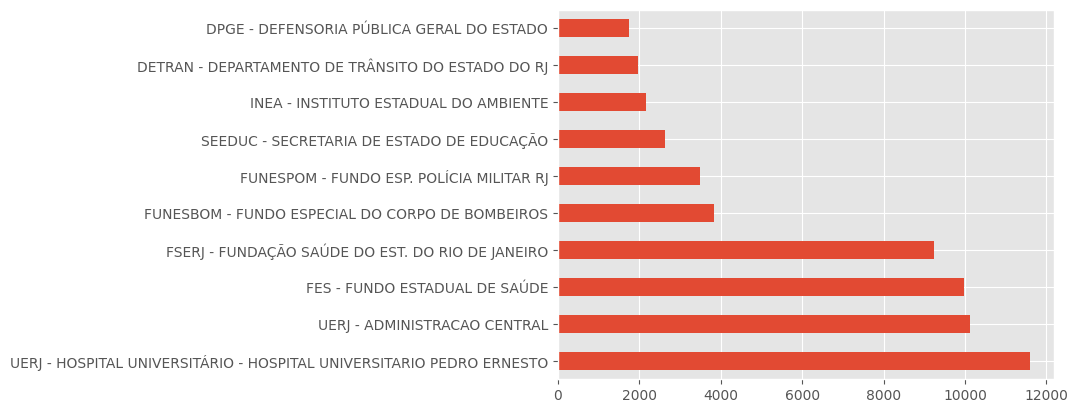

In [ ]:
top10 = contrato['Unidade'].value_counts().head(10)
top10.plot.barh()
# Exibir os resultados
print(top10)

<Axes: ylabel='UNIDADE REQUERENTE'>

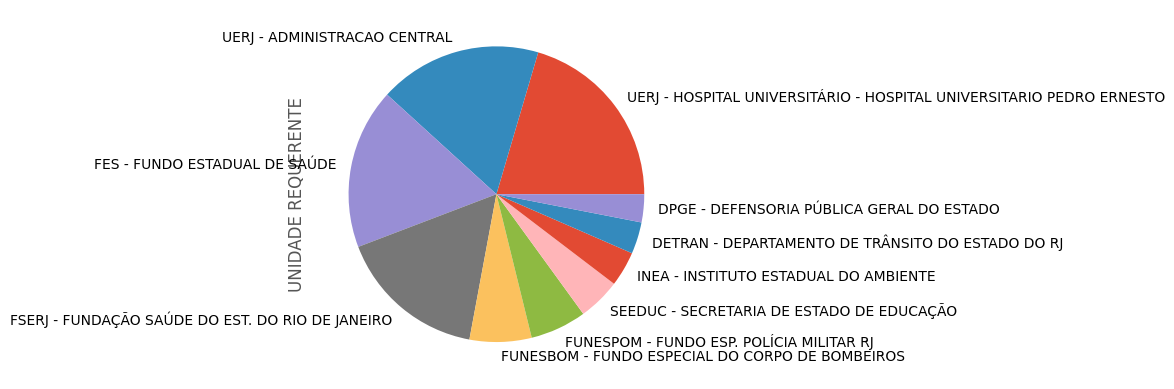

In [ ]:
top10.plot.pie(ylabel='UNIDADE REQUERENTE')

IMPRENSA OFICIAL DO ESTADO DO RIO DE JANEIRO                                              1188
COSTA CAMARGO COMERCIO DE PRODUTOS HOSPITALARES LTDA (MATRIZ)                             1002
CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA                                             875
HOUSE MED PRODUTOS FARMACEUTICOS E HOSPITALARES LTDA                                       717
IMPRENSA OFICIAL DO ESTADO DO RIO DE JANEIRO                                               575
PRODERJ - CENTRO DE TECNOLOGIA DE INFORMACAO E COMUNICACAO DO ESTADO DO RIO DE JANEIRO     564
JRG DISTRIBUIDORA DE MEDICAMENTOS HOSPITALARES LTDA -                                      531
AVANTE BRASIL COMERCIO EIRELI ME                                                           528
NOVA LINEA COMERCIO DE PRODUTOS FARMACEUTICOS EIRELI                                       478
LEMAN MEDICAMENTOS E CIA LTDA                                                              465
Name: Fornecedor, dtype: int64


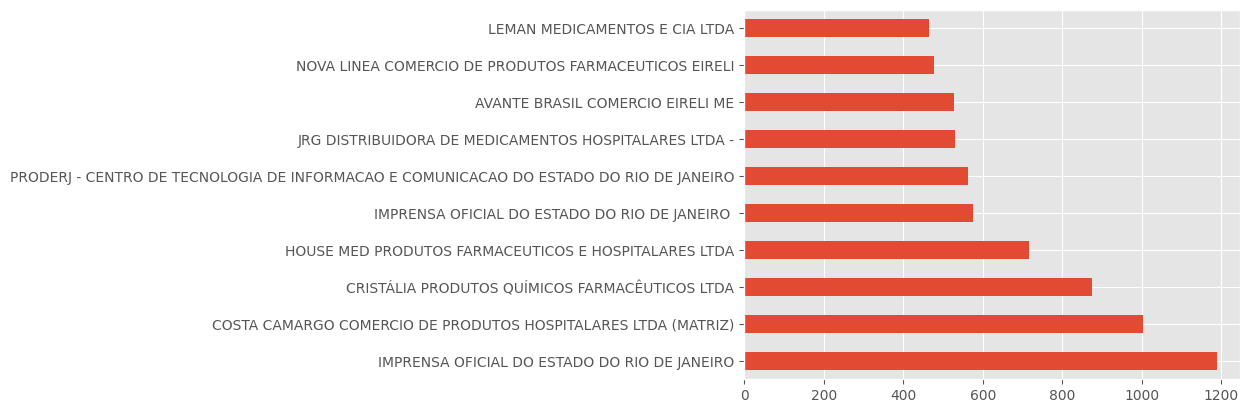

In [51]:
top10f = contrato['Fornecedor'].value_counts().head(10)
top10f.plot.barh()
# Exibir os resultados
print(top10f)

Solicitação de Compra                27136
Pequenas Compras                     23580
Pregão Eletrônico - Lei 8.666        17382
Inexigibilidade - Lei 8.666          11406
Dispensa - Especial                  10305
Adesão a Ata Externa - Lei 8.666      2500
Termo de Ajuste de Contas - TAC       2274
Renovação de Contrato                 1274
Processos Antigos                     1125
Adesão a  Ata Interna - Lei 8.666     1104
Name: Tipo de Aquisição, dtype: int64


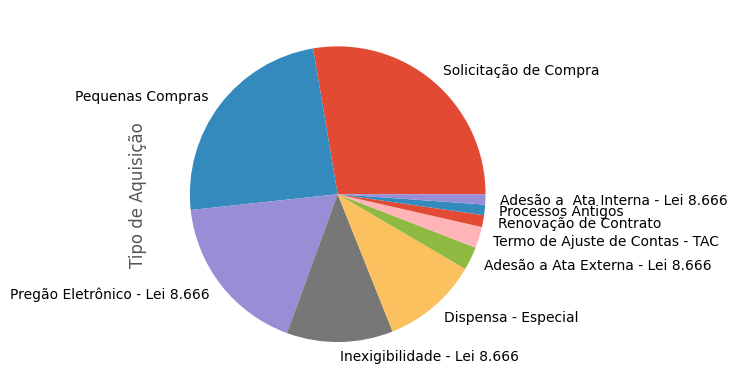

In [52]:
top10fa = contrato['Tipo de Aquisição'].value_counts().head(10)
top10fa.plot.pie()
# Exibir os resultados
print(top10fa)

In [ ]:
top_10_frequent_items = contrato['Unidade'].value_counts().head(10)

# Calcular o total de gastos por cada categoria
total_gastos_por_categoria = contrato.groupby('Unidade')['Valor Total Liquidado (R$)'].sum()

# Filtrar apenas as ocorrências mais frequentes
total_gastos_top_10 = total_gastos_por_categoria[top_10_frequent_items.index]

# Exibir os resultados
print(total_gastos_top_10)


UERJ - HOSPITAL UNIVERSITÁRIO - HOSPITAL UNIVERSITARIO PEDRO ERNESTO    5.400,006.200,002.880,001.968,7571,00360,00150...
UERJ - ADMINISTRACAO CENTRAL                                            1.362,30490.570,221.883.970,005.142.930,7417.6...
FES - FUNDO ESTADUAL DE SAÚDE                                           1.621,8026.194,44756,003.596,40712,80840.300,0...
FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO                        1.188.000,00121.569,70319.278,486.550,00517.33...
FUNESBOM - FUNDO ESPECIAL DO CORPO DE BOMBEIROS                         26.373,901.327,20694,26619.920,60134.614,863.2...
FUNESPOM - FUNDO ESP. POLÍCIA MILITAR RJ                                8.172,006.120,0058.320,00358,201.800,0012.480,...
SEEDUC - SECRETARIA DE ESTADO DE EDUCAÇÃO                               2.821,3127.045,6592.473,9222.622,1812.357,055....
INEA - INSTITUTO ESTADUAL DO AMBIENTE                                   26.040,004.000,00265.180,002.363.370,3510.130....
DETRAN - DEPARTAMENTO DE

In [ ]:
resulttt = pd.concat([ordem_decrescente, ordem_decrescente_itens], ignore_index=True)
print(resulttt)
resulttt.head(50)

In [ ]:
resulttt.columns

In [47]:
dados_organizados = resulttt[[#'index',
                              'Contratação',
                              'Status Contratação',
                              'Data Contratação',
                              'Item',
                              'Unidade',
                              'Tipo de Aquisição',
                              'Data Início Vigência',
                              'Data Fim Vigência',
                              'Fornecedor',
                              #'CPF/CNPJ',
                              'Valor Total Contrato/Valor Estimado para Contratação (R$)',
                              'Valor Total Empenhado (R$)',
                              'Valor Total Liquidado (R$)',
                              ' Valor Total Pago (R$)', #'ID Item',
                              'Qtde Original',
                              'VL. Unit.Original',
                              'Total Aditivada/Suprimida',
                              'VL. Unit.Aditivado/Suprimido'
                             ]].copy()

In [ ]:
from google.colab import files

resulttt.to_csv('resulttt.csv')
files.download('resulttt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dados_organizados.head()

In [ ]:
busca_contratos = dados_organizados[dados_organizados['Contratação'] == '2016002393']

# Print o resultado
print(busca_contratos)

In [ ]:
##APLICAÇÃO CITADA NO RELATÓRIO##


dados_organizados['Contratação'] = dados_organizados['Contratação'].astype(str)

codigo_contrato_comum = '2023006264'  # Substitua isso pelo código desejado

# Filtrando todas as ocorrências com base no código desejado
resultados = dados_organizados.loc[dados_organizados['Contratação'] == codigo_contrato_comum]

# Exibindo o resultado
resultados.head(20)

In [ ]:
contrato.dtypes

In [ ]:
#COLUNA PARA NUMÉRICO--------------------------------------------------------------------------------------------

In [ ]:
#TRANSFORMANDO ALGUNAS COLUNAS PARA NUMERICA
print(contrato['Valor Total Empenhado (R$)'].unique())
# Convertendo uma coluna específica para tipo string e removendo caracteres não numéricos
contrato['Valor Total Empenhado (R$)'] = contrato['Valor Total Empenhado (R$)'].astype(str).replace('[^0-9]', '', regex=True)

# Convertendo a coluna para tipo numérico, substituindo por 0 apenas nos casos de erro
contrato['Valor Total Empenhado (R$)'] = pd.to_numeric(contrato['Valor Total Empenhado (R$)'], errors='coerce').fillna(0)

# Exibindo tipos de dados após a conversão
print(contrato.dtypes)


In [ ]:
contrato.describe()

In [ ]:
# Lista de colunas a serem processadas   ##transformar em numero
colunas_a_processar = ['Valor Total Contrato/Valor Estimado para Contratação (R$)', 'Valor Total Liquidado (R$)', ' Valor Total Pago (R$)']

# Iterar sobre as colunas e realizar o processamento
for coluna in colunas_a_processar:
    contrato[coluna] = contrato[coluna].astype(str).replace('[^0-9]', '', regex=True)
    contrato[coluna] = pd.to_numeric(contrato[coluna], errors='coerce').fillna(0)

# Exibindo tipos de dados após a conversão
print(contrato.dtypes)
---------------------------------------------------------------------------------------------------

In [53]:
import pandas as pd


top3_compradores = contrato['Unidade'].value_counts().head(3).index

for comprador in top3_compradores:
    # Filtra o DataFrame para o comprador específico
    df_comprador = contrato[contrato['Unidade'] == comprador]

    # Obtém os top 5 fornecedores para o comprador específico
    top5_fornecedores = df_comprador['Fornecedor'].value_counts().head(5)

    # Imprime os resultados
    print(f"\nTop 5 fornecedores para {comprador}:")
    print(top5_fornecedores)



Top 5 fornecedores para UERJ - HOSPITAL UNIVERSITÁRIO - HOSPITAL UNIVERSITARIO PEDRO ERNESTO:
CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA                   394
COSTA CAMARGO COMERCIO DE PRODUTOS HOSPITALARES LTDA (MATRIZ)    248
AVANTE BRASIL COMERCIO EIRELI ME                                 217
COMERCIAL CARDU EIRELLI ME                                       216
NOVA LINEA COMERCIO DE PRODUTOS FARMACEUTICOS EIRELI             152
Name: Fornecedor, dtype: int64

Top 5 fornecedores para UERJ - ADMINISTRACAO CENTRAL:
UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO                                   264
PORTO SEGURO CIA DE SEGUROS GERAIS                                         206
JESSI PAPELARIA E INFORMATICA EM GERAL LTDA                                148
AJV PAPELARIA E BAZAR EIRELI ME                                            148
MENUCCI DISTRIBUIDORA DE ARTIGOS DE PAPELARIA E SERVIÇOS GRÁFICOS LTDA.     91
Name: Fornecedor, dtype: int64

Top 5 fornecedores para FES - FUNDO ESTADUAL DE

<ipython-input-54-84b3a88bf2c9>:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


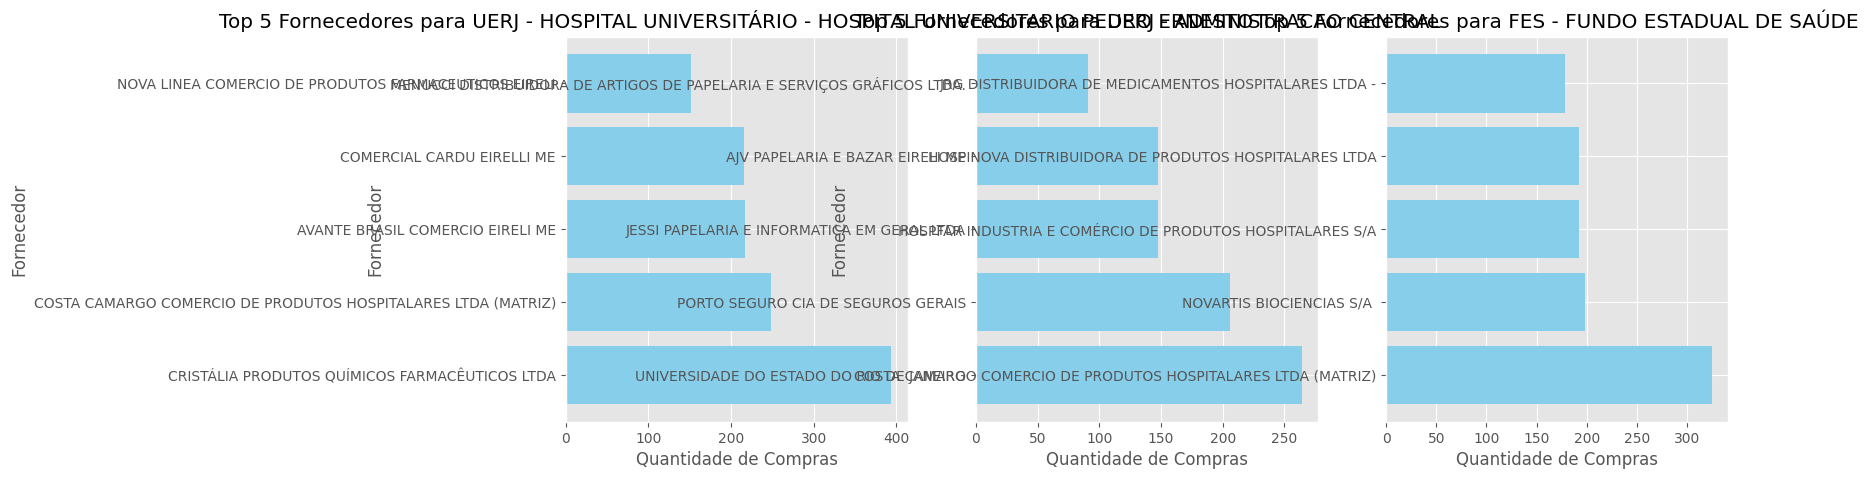

In [54]:
import matplotlib.pyplot as plt


top3_compradores = contrato['Unidade'].value_counts().head(3).index

# Configurando subplots para mostrar três tipos de gráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for idx, comprador in enumerate(top3_compradores):
    # Filtra o DataFrame para o comprador específico
    df_comprador = contrato[contrato['Unidade'] == comprador]

    # Obtém os top 5 fornecedores para o comprador específico
    top5_fornecedores = df_comprador['Fornecedor'].value_counts().head(5)

    # Gráfico de barras horizontais
    axes[idx].barh(top5_fornecedores.index, top5_fornecedores.values, color='skyblue')
    axes[idx].set_title(f'Top 5 Fornecedores para {comprador}')
    axes[idx].set_xlabel('Quantidade de Compras')
    axes[idx].set_ylabel('Fornecedor')

# Ajusta o layout para evitar sobreposições
plt.tight_layout()

# Exibe os gráficos
plt.show()


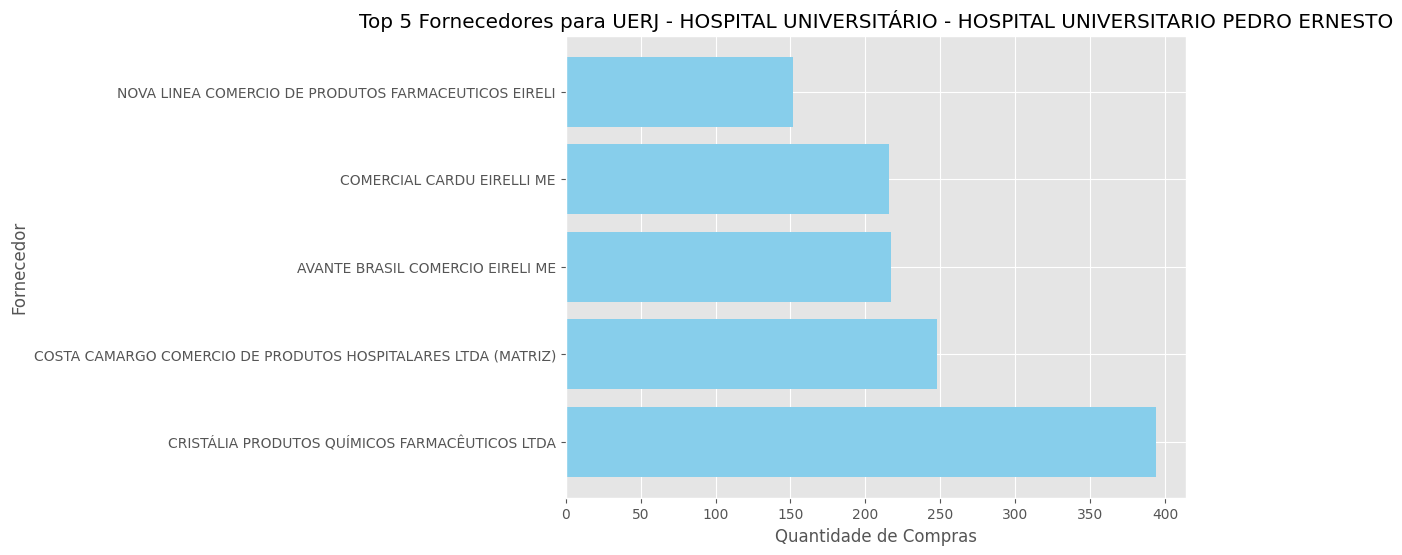

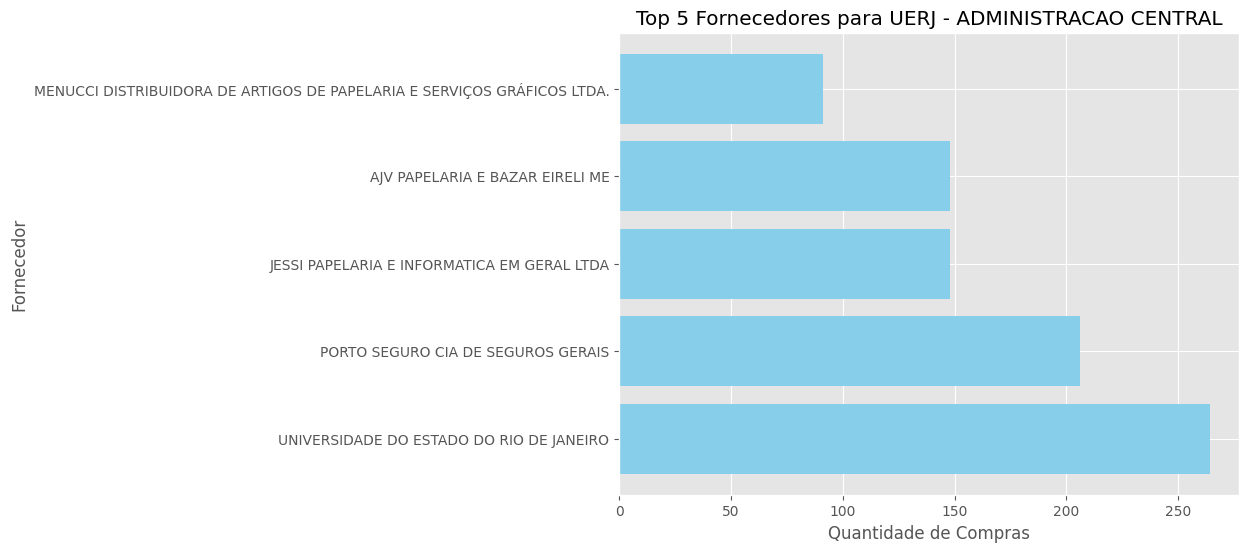

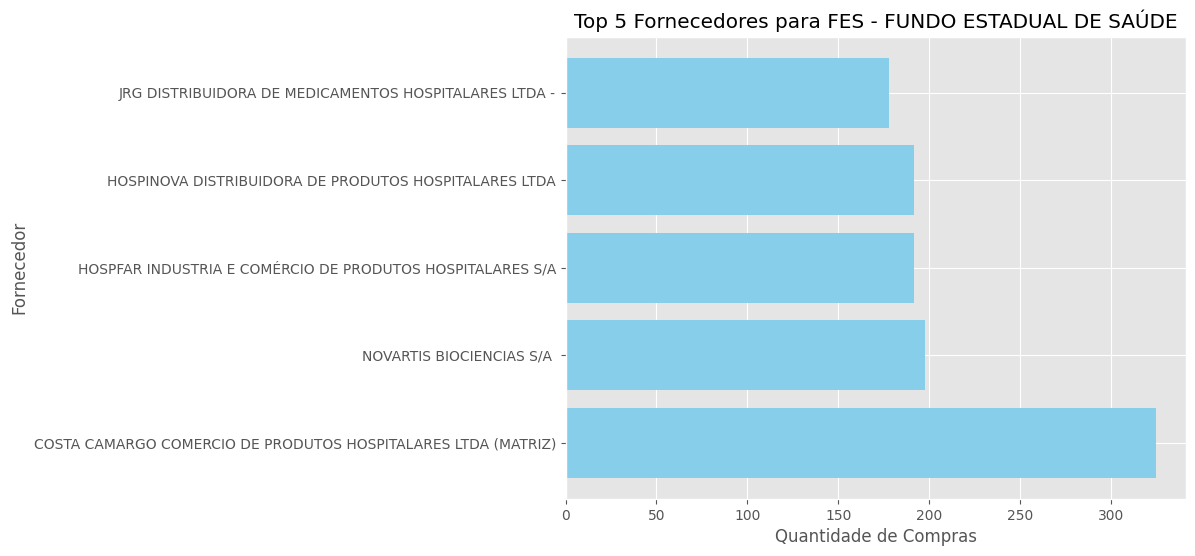

In [58]:
import matplotlib.pyplot as plt


top3_compradores = contrato['Unidade'].value_counts().head(3).index

for idx, comprador in enumerate(top3_compradores):
    # Criar uma nova figura para cada top 3 comprador
    fig, ax = plt.subplots(figsize=(8, 6))

    # Filtra o DataFrame para o comprador específico
    df_comprador = contrato[contrato['Unidade'] == comprador]

    # Obtém os top 5 fornecedores para o comprador específico
    top5_fornecedores = df_comprador['Fornecedor'].value_counts().head(5)

    # Gráfico de barras horizontais com rotação do texto
    ax.barh(top5_fornecedores.index, top5_fornecedores.values, color='skyblue')
    ax.set_title(f'Top 5 Fornecedores para {comprador}')
    ax.set_xlabel('Quantidade de Compras')
    ax.set_ylabel('Fornecedor')


    # Exibe a figura
    plt.show()

